In [4]:
# (Hack) add the parent directory to the path in order to be able to import the posCouche module 
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from posCouche.poscouche import poscouche
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Resonance layers vs Itor, frequency, harmonic number and species

<IPython.core.display.Javascript object>


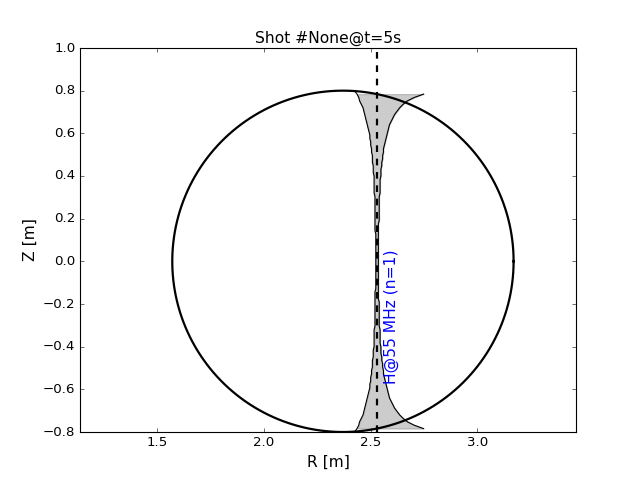

Resonance radius H = 2.529315044030706 m


C:\Users\JH218595\Documents\posCouche\posCouche\poscouche.py:129: UserWarning: No vacuum chamber information: ideal wall profile plotted
  warnings.warn('No vacuum chamber information: ideal wall profile plotted')


In [5]:
poscouche(Itor=1250, freq=55, n=1, species='H') # species can be 'H', 'D', 'T', '3He', '4He'

<IPython.core.display.Javascript object>


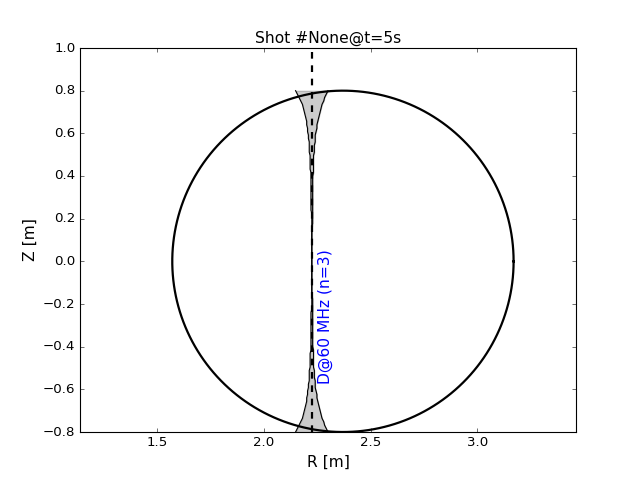

Resonance radius D = 2.2242642552264043 m


C:\Users\JH218595\Documents\posCouche\posCouche\poscouche.py:129: UserWarning: No vacuum chamber information: ideal wall profile plotted
  warnings.warn('No vacuum chamber information: ideal wall profile plotted')


In [6]:
poscouche(Itor=800, freq=60, n=3, species='D')

<IPython.core.display.Javascript object>


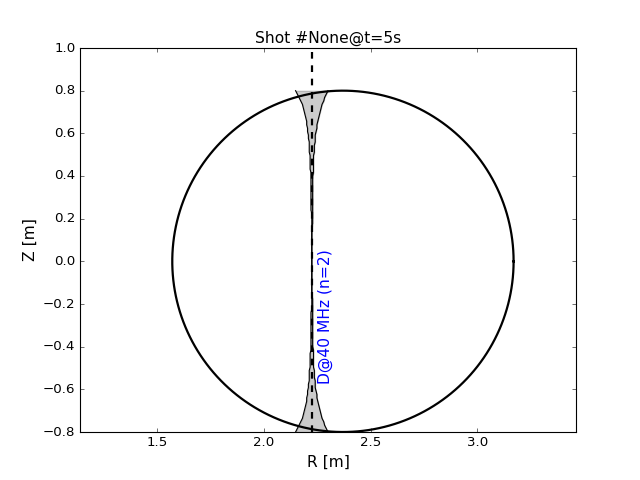

Resonance radius D = 2.2242642552264043 m


C:\Users\JH218595\Documents\posCouche\posCouche\poscouche.py:129: UserWarning: No vacuum chamber information: ideal wall profile plotted
  warnings.warn('No vacuum chamber information: ideal wall profile plotted')


In [7]:
poscouche(Itor=800, freq=40, n=2, species='D')

<IPython.core.display.Javascript object>


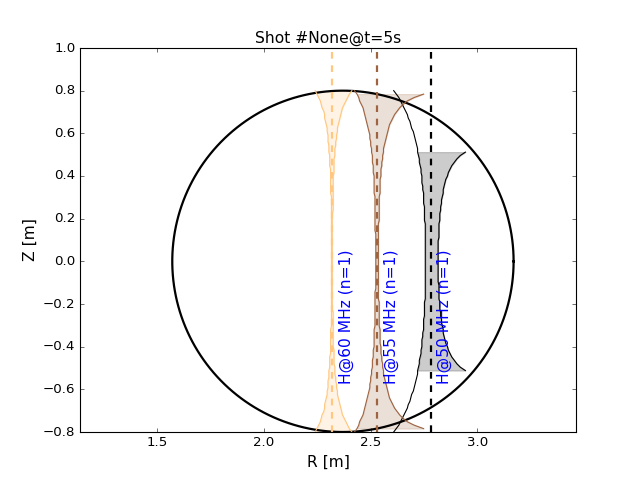

C:\Users\JH218595\Documents\posCouche\posCouche\poscouche.py:129: UserWarning: No vacuum chamber information: ideal wall profile plotted
  warnings.warn('No vacuum chamber information: ideal wall profile plotted')


Resonance radius H = 2.782246548433777 m
Resonance radius H = 2.529315044030706 m
Resonance radius H = 2.318538790361481 m


In [8]:
poscouche(freq=[50, 55, 60], Itor=1250, species='H')

# Resonance layer for a TS/WEST shot

<IPython.core.display.Javascript object>


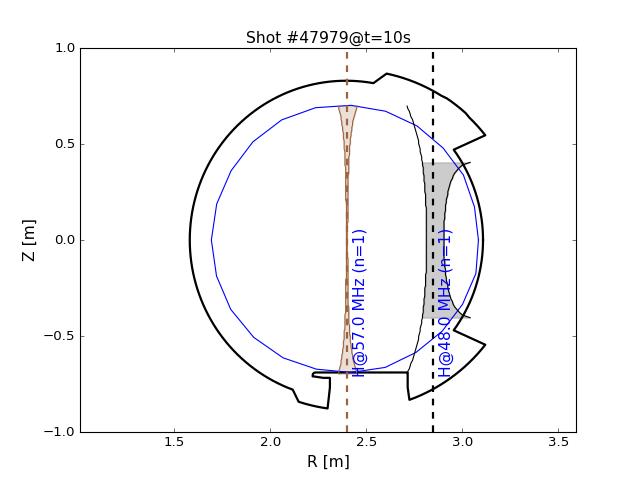

You're asking a lot of data, please wait
Resonance radius H = [ 2.84811502] m
Resonance radius H = [ 2.39841265] m


In [9]:
poscouche(shot=47979, time=10)       